# Recurrent Neural Networks

Recurrent Neural Networks (RNNs) are designed to process sequential data by maintaining hidden states that capture temporal dependencies.

In this tutorial, you will learn:

- 🔄 **RNN Basics** - Understanding recurrence and hidden states
- 🧠 **LSTM** - Long Short-Term Memory for long-term dependencies
- ⚡ **GRU** - Gated Recurrent Unit as efficient alternative
- 📊 **Sequence Processing** - Handling variable-length sequences
- 💡 **Practical Examples** - Sentiment analysis, time series

## Why RNNs?

RNNs excel at:
- 📝 Natural language processing
- 🎵 Speech and audio
- 📈 Time series forecasting
- 🎬 Video analysis

In [5]:
import brainstate
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt

## 1. RNN Basics

An RNN processes sequences one element at a time, updating its hidden state:

**h_t = tanh(W_xh @ x_t + W_hh @ h_{t-1} + b)**

### Simple RNN Cell

In [6]:

# RNNCell: Basic recurrent unit
brainstate.random.seed(42)
rnn_cell = brainstate.nn.ValinaRNNCell(num_in=10, num_out=20)
brainstate.nn.init_all_states(rnn_cell)

print("RNNCell:")
print(rnn_cell)
print(f"Input size: {rnn_cell.in_size}")
print(f"Hidden size: {rnn_cell.out_size}")

# Process a single timestep
x_t = brainstate.random.randn(10)
hidden_before = rnn_cell.h.value
hidden_after = rnn_cell(x_t)

print(f"Input shape: {x_t.shape}")
print(f"Previous hidden shape: {hidden_before.shape}")
print(f"New hidden shape: {hidden_after.shape}")


RNNCell:
ValinaRNNCell(
  in_size=(10,),
  out_size=(20,),
  num_out=20,
  num_in=10,
  state_initializer=ZeroInit(
    unit=Unit(10.0^0)
  ),
  activation=<function relu at 0x0000014FFBBF5F80>,
  W=Linear(
    in_size=(30,),
    out_size=(20,),
    w_mask=None,
    weight=ParamState(
      value={
        'bias': ShapedArray(float32[20]),
        'weight': ShapedArray(float32[30,20])
      }
    )
  ),
  h=HiddenState(
    value=ShapedArray(float32[20])
  )
)
Input size: (10,)
Hidden size: (20,)
Input shape: (10,)
Previous hidden shape: (20,)
New hidden shape: (20,)


### Processing Sequences

Let's process a complete sequence:

In [7]:

class SimpleRNN(brainstate.nn.Module):
    """Simple RNN for sequence processing."""

    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.rnn_cell = brainstate.nn.ValinaRNNCell(num_in=input_size, num_out=hidden_size)
        self.output_layer = brainstate.nn.Linear((hidden_size,), (output_size,))
        self.hidden_size = hidden_size

    def update(self, sequence):
        # Reset recurrent state for each new sequence
        brainstate.nn.init_all_states(self)
        rnn_out = brainstate.transform.for_loop(self.rnn_cell, sequence)
        return self.output_layer(rnn_out)

# Create RNN
brainstate.random.seed(0)
rnn = SimpleRNN(input_size=5, hidden_size=10, output_size=3)

# Test sequence
sequence = brainstate.random.randn(7, 5)  # 7 timesteps, 5 features
outputs = rnn(sequence)

print(f"Input sequence shape: {sequence.shape}")
print(f"Output sequence shape: {outputs.shape}")
print(f"Outputs: {outputs}")


Input sequence shape: (7, 5)
Output sequence shape: (7, 3)
Outputs: [[ 0.02491025 -1.2344697  -0.7660187 ]
 [ 1.0200831  -0.9450466   0.5592617 ]
 [ 0.5109155  -0.7276021  -0.29766443]
 [ 0.8082594   0.6000599   0.46565723]
 [ 1.1170439   0.4770828  -0.37073383]
 [ 1.4667886  -1.4823256   0.30516532]
 [ 0.79357237  0.4356203   0.21530463]]


### Visualizing RNN Processing

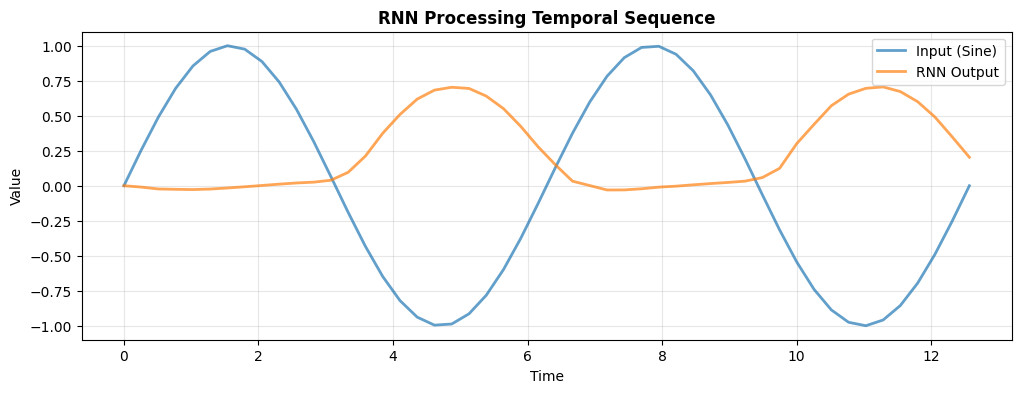

RNN learns to process temporal patterns


In [8]:
# Generate sine wave sequence
t = jnp.linspace(0, 4 * jnp.pi, 50)
sine_wave = jnp.sin(t)

# Prepare as sequence (add feature dimension)
sequence = sine_wave[:, None]

# Create RNN
brainstate.random.seed(42)
rnn = SimpleRNN(input_size=1, hidden_size=16, output_size=1)

# Process sequence
outputs = rnn(sequence).flatten()

# Plot
plt.figure(figsize=(12, 4))
plt.plot(t, sine_wave, linewidth=2, label='Input (Sine)', alpha=0.7)
plt.plot(t, outputs, linewidth=2, label='RNN Output', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('RNN Processing Temporal Sequence', fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print("RNN learns to process temporal patterns")

## 2. LSTM - Long Short-Term Memory

LSTM addresses the vanishing gradient problem with gating mechanisms:

- **Forget gate**: What to forget from cell state
- **Input gate**: What new information to store
- **Output gate**: What to output from cell state

### LSTM Cell

In [9]:

# LSTMCell: Advanced recurrent unit
brainstate.random.seed(42)
lstm_cell = brainstate.nn.LSTMCell(num_in=10, num_out=20)
brainstate.nn.init_all_states(lstm_cell)

print("LSTMCell:")
print(lstm_cell)

# LSTM has two states: hidden (h) and cell (c)
hidden_before = lstm_cell.h.value
cell_before = lstm_cell.c.value

# Process one timestep
x_t = brainstate.random.randn(10)
hidden_after = lstm_cell(x_t)
cell_after = lstm_cell.c.value

print(f"Input: {x_t.shape}")
print(f"Hidden state shape: {hidden_after.shape}")
print(f"Cell state shape: {cell_after.shape}")
print("✅ LSTM maintains both hidden and cell states")
print("✅ Cell state provides long-term memory")


LSTMCell:
LSTMCell(
  in_size=(10,),
  out_size=(20,),
  num_out=20,
  num_in=10,
  state_initializer=ZeroInit(
    unit=Unit(10.0^0)
  ),
  activation=<function tanh at 0x0000014FFBB622A0>,
  W=Linear(
    in_size=(30,),
    out_size=(80,),
    w_mask=None,
    weight=ParamState(
      value={
        'bias': ShapedArray(float32[80]),
        'weight': ShapedArray(float32[30,80])
      }
    )
  ),
  c=HiddenState(
    value=ShapedArray(float32[20])
  ),
  h=HiddenState(
    value=ShapedArray(float32[20])
  )
)
Input: (10,)
Hidden state shape: (20,)
Cell state shape: (20,)
✅ LSTM maintains both hidden and cell states
✅ Cell state provides long-term memory


### LSTM Network

In [10]:

class LSTMNet(brainstate.nn.Module):
    """LSTM network for sequence processing."""

    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.lstm_cell = brainstate.nn.LSTMCell(num_in=input_size, num_out=hidden_size)
        self.output_layer = brainstate.nn.Linear((hidden_size,), (output_size,))
        self.hidden_size = hidden_size

    def update(self, sequence):
        brainstate.nn.init_all_states(self)
        rnn_out = brainstate.transform.for_loop(self.lstm_cell, sequence)
        return self.output_layer(rnn_out)

# Create LSTM
brainstate.random.seed(0)
lstm = LSTMNet(input_size=5, hidden_size=20, output_size=3)

# Test
sequence = brainstate.random.randn(10, 5)
outputs = lstm(sequence)

print(f"LSTM Network:")
print(lstm)
print(f"Sequence: {sequence.shape} → Output: {outputs.shape}")


LSTM Network:
LSTMNet(
  lstm_cell=LSTMCell(
    in_size=(5,),
    out_size=(20,),
    num_out=20,
    num_in=5,
    state_initializer=ZeroInit(
      unit=Unit(10.0^0)
    ),
    activation=<function tanh at 0x0000014FFBB622A0>,
    W=Linear(
      in_size=(25,),
      out_size=(80,),
      w_mask=None,
      weight=ParamState(
        value={
          'bias': ShapedArray(float32[80]),
          'weight': ShapedArray(float32[25,80])
        }
      )
    ),
    c=HiddenState(
      value=ShapedArray(float32[20])
    ),
    h=HiddenState(
      value=ShapedArray(float32[20])
    )
  ),
  output_layer=Linear(
    in_size=(20,),
    out_size=(3,),
    w_mask=None,
    weight=ParamState(
      value={
        'bias': ShapedArray(float32[3]),
        'weight': ShapedArray(float32[20,3])
      }
    )
  ),
  hidden_size=20
)
Sequence: (10, 5) → Output: (10, 3)


## 3. GRU - Gated Recurrent Unit

GRU simplifies LSTM with fewer gates:

- **Reset gate**: How much past to forget
- **Update gate**: How much to update

### GRU Cell

In [11]:

# GRUCell: Efficient alternative to LSTM
brainstate.random.seed(42)
gru_cell = brainstate.nn.GRUCell(num_in=10, num_out=20)
brainstate.nn.init_all_states(gru_cell)

print("GRUCell:")
print(gru_cell)

# GRU only has hidden state (no separate cell state)
hidden_before = gru_cell.h.value
x_t = brainstate.random.randn(10)
hidden_after = gru_cell(x_t)

print(f"Input: {x_t.shape}")
print(f"Hidden state shape: {hidden_after.shape}")
print("✅ Simpler than LSTM (no cell state)")
print("✅ Faster training, fewer parameters")
print("✅ Often performs similarly to LSTM")


GRUCell:
GRUCell(
  in_size=(10,),
  out_size=(20,),
  state_initializer=ZeroInit(
    unit=Unit(10.0^0)
  ),
  num_out=20,
  num_in=10,
  activation=<function tanh at 0x0000014FFBB622A0>,
  Wrz=Linear(
    in_size=(30,),
    out_size=(40,),
    w_mask=None,
    weight=ParamState(
      value={
        'bias': ShapedArray(float32[40]),
        'weight': ShapedArray(float32[30,40])
      }
    )
  ),
  Wh=Linear(
    in_size=(30,),
    out_size=(20,),
    w_mask=None,
    weight=ParamState(
      value={
        'bias': ShapedArray(float32[20]),
        'weight': ShapedArray(float32[30,20])
      }
    )
  ),
  h=HiddenState(
    value=ShapedArray(float32[20])
  )
)
Input: (10,)
Hidden state shape: (20,)
✅ Simpler than LSTM (no cell state)
✅ Faster training, fewer parameters
✅ Often performs similarly to LSTM


### Comparing RNN, LSTM, and GRU

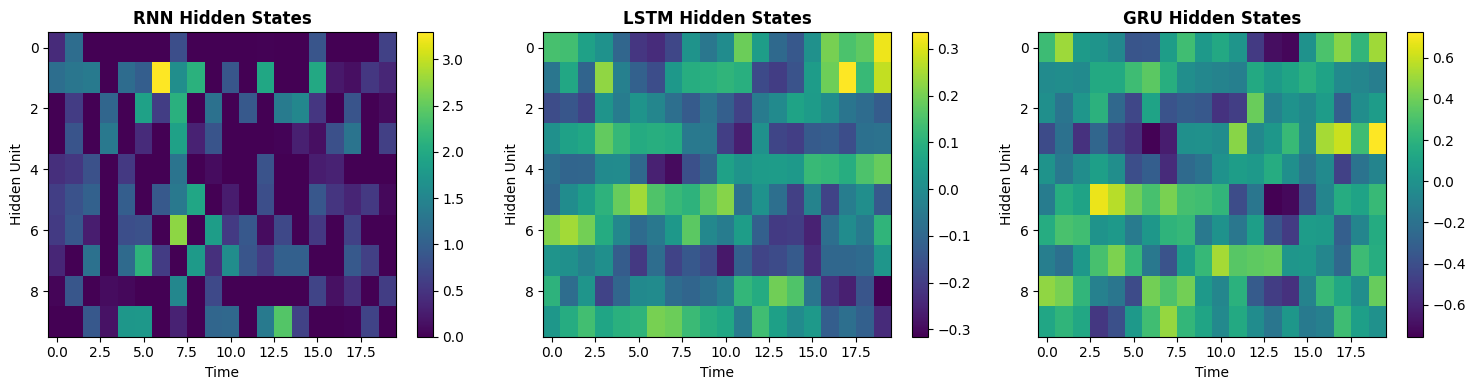

Different activation patterns across time


In [12]:

# Create all three types
brainstate.random.seed(0)
input_size, hidden_size = 5, 10

rnn_cell = brainstate.nn.ValinaRNNCell(num_in=input_size, num_out=hidden_size)
lstm_cell = brainstate.nn.LSTMCell(num_in=input_size, num_out=hidden_size)
gru_cell = brainstate.nn.GRUCell(num_in=input_size, num_out=hidden_size)

# Test on same sequence
sequence = brainstate.random.randn(20, input_size)

# Process with RNN
brainstate.nn.init_all_states(rnn_cell)
rnn_states = []
for x_t in sequence:
    rnn_states.append(rnn_cell(x_t))
rnn_states = jnp.stack(rnn_states)

# Process with LSTM
brainstate.nn.init_all_states(lstm_cell)
lstm_states = []
for x_t in sequence:
    lstm_states.append(lstm_cell(x_t))
lstm_states = jnp.stack(lstm_states)

# Process with GRU
brainstate.nn.init_all_states(gru_cell)
gru_states = []
for x_t in sequence:
    gru_states.append(gru_cell(x_t))
gru_states = jnp.stack(gru_states)

# Visualize hidden states
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.imshow(np.array(rnn_states.T), aspect='auto', cmap='viridis')
plt.colorbar()
plt.title('RNN Hidden States', fontweight='bold')
plt.xlabel('Time')
plt.ylabel('Hidden Unit')

plt.subplot(1, 3, 2)
plt.imshow(np.array(lstm_states.T), aspect='auto', cmap='viridis')
plt.colorbar()
plt.title('LSTM Hidden States', fontweight='bold')
plt.xlabel('Time')
plt.ylabel('Hidden Unit')

plt.subplot(1, 3, 3)
plt.imshow(np.array(gru_states.T), aspect='auto', cmap='viridis')
plt.colorbar()
plt.title('GRU Hidden States', fontweight='bold')
plt.xlabel('Time')
plt.ylabel('Hidden Unit')

plt.tight_layout()
plt.show()

print("Different activation patterns across time")


## 4. Practical Example: Sequence Classification

Let's build a complete sequence classifier:

In [13]:

class SequenceClassifier(brainstate.nn.Module):
    """Classify sequences using LSTM."""

    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()

        # LSTM layer
        self.lstm = brainstate.nn.LSTMCell(num_in=input_size, num_out=hidden_size)

        # Classifier
        self.fc = brainstate.nn.Linear((hidden_size,), (num_classes,))
        self.hidden_size = hidden_size

    def update(self, sequence):
        """Classify a sequence and return logits."""
        brainstate.nn.init_all_states(self)
        rnn_out = brainstate.transform.for_loop(self.lstm, sequence)
        return self.fc(rnn_out)

# Create classifier
brainstate.random.seed(42)
classifier = SequenceClassifier(
    input_size=8,
    hidden_size=32,
    num_classes=3
)

print("Sequence Classifier:")
print(classifier)

# Test with batch of sequences
sequences = [
    brainstate.random.randn(10, 8),  # Short sequence
    brainstate.random.randn(15, 8),  # Medium sequence
    brainstate.random.randn(20, 8),  # Long sequence
]

print("Classifying sequences of different lengths:")
for i, seq in enumerate(sequences):
    logits = classifier(seq)
    pred = jnp.argmax(logits)
    print(f"  Sequence {i + 1} (length={seq.shape[0]:2d}): logits={logits}, predicted class={pred}")


Sequence Classifier:
SequenceClassifier(
  lstm=LSTMCell(
    in_size=(8,),
    out_size=(32,),
    num_out=32,
    num_in=8,
    state_initializer=ZeroInit(
      unit=Unit(10.0^0)
    ),
    activation=<function tanh at 0x0000014FFBB622A0>,
    W=Linear(
      in_size=(40,),
      out_size=(128,),
      w_mask=None,
      weight=ParamState(
        value={
          'bias': ShapedArray(float32[128]),
          'weight': ShapedArray(float32[40,128])
        }
      )
    )
  ),
  fc=Linear(
    in_size=(32,),
    out_size=(3,),
    w_mask=None,
    weight=ParamState(
      value={
        'bias': ShapedArray(float32[3]),
        'weight': ShapedArray(float32[32,3])
      }
    )
  ),
  hidden_size=32
)
Classifying sequences of different lengths:
  Sequence 1 (length=10): logits=[[-0.01547858  0.13513905  0.00754709]
 [ 0.05315272  0.04406237 -0.03946485]
 [-0.01024251  0.01766445 -0.30734372]
 [-0.08865614  0.21953714 -0.2214272 ]
 [-0.01125905  0.23754263 -0.07070659]
 [-0.18919654  

## 5. Time Series Prediction

Time series data: (200,)
Sequences (X): (185, 15, 1)
Targets (y): (185,)


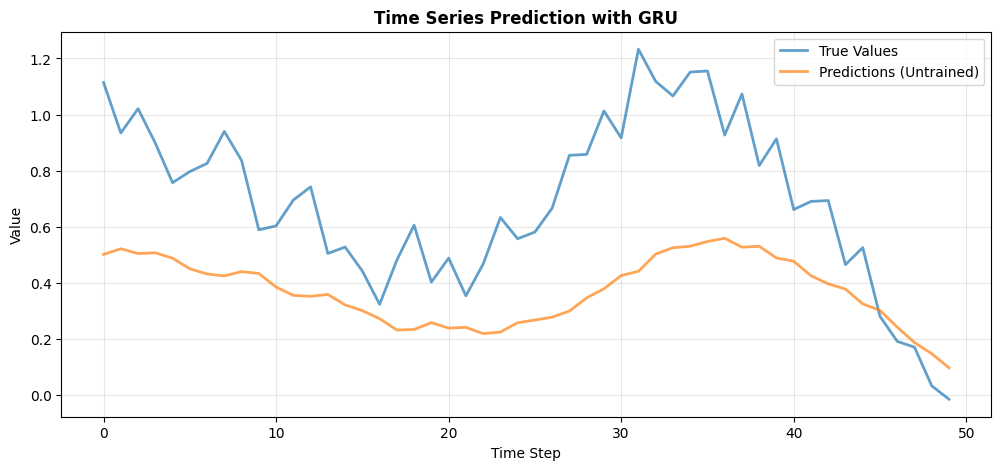

MSE (untrained): 0.1451
💡 With training, GRU can learn to predict future values


In [14]:

# Generate synthetic time series
def generate_time_series(n_steps=100):
    t = jnp.linspace(0, 10, n_steps)
    # Combination of sine waves
    series = jnp.sin(t) + 0.5 * jnp.sin(3 * t) + 0.1 * brainstate.random.randn(n_steps)
    return series

# Create sequences for prediction
def create_sequences(data, seq_length=10):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return jnp.array(X), jnp.array(y)

# Generate data
brainstate.random.seed(0)
time_series = generate_time_series(200)
X, y = create_sequences(time_series, seq_length=15)

# Add feature dimension
X = X[:, :, None]

print(f"Time series data: {time_series.shape}")
print(f"Sequences (X): {X.shape}")
print(f"Targets (y): {y.shape}")

# Create predictor
class TimeSeriesPredictor(brainstate.nn.Module):
    def __init__(self, hidden_size=32):
        super().__init__()
        self.gru = brainstate.nn.GRUCell(num_in=1, num_out=hidden_size)
        self.fc = brainstate.nn.Linear((hidden_size,), (1,))
        self.hidden_size = hidden_size

    def update(self, sequence):
        brainstate.nn.init_all_states(self)
        brainstate.transform.for_loop(self.gru, sequence)
        prediction = self.fc(self.gru.h.value)
        return prediction.squeeze()

# Create and test predictor
brainstate.random.seed(42)
predictor = TimeSeriesPredictor(hidden_size=64)

# Make predictions on test data
predictions = []
for i in range(min(50, len(X))):
    pred = predictor(X[i])
    predictions.append(pred)

predictions = jnp.array(predictions)
targets = y[:len(predictions)]

# Plot
plt.figure(figsize=(12, 5))
plt.plot(targets, label='True Values', linewidth=2, alpha=0.7)
plt.plot(predictions, label='Predictions (Untrained)', linewidth=2, alpha=0.7)
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title('Time Series Prediction with GRU', fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

mse = jnp.mean((predictions - targets) ** 2)
print(f"MSE (untrained): {mse:.4f}")
print("💡 With training, GRU can learn to predict future values")


## Summary

In this tutorial, you learned:

✅ **RNN Basics**
  - Recurrence and hidden states
  - Processing sequences step-by-step
  - Building simple RNN networks

✅ **LSTM**
  - Gating mechanisms (forget, input, output)
  - Cell state for long-term memory
  - Handling long-term dependencies

✅ **GRU**
  - Simplified gating (reset, update)
  - Fewer parameters than LSTM
  - Efficient alternative

✅ **Practical Applications**
  - Sequence classification
  - Time series prediction
  - Variable-length sequences

### Quick Comparison

| Model | States | Gates | Best For |
|-------|--------|-------|----------|
| **RNN** | 1 (h) | 0 | Short sequences, simple patterns |
| **LSTM** | 2 (h, c) | 3 | Long sequences, complex dependencies |
| **GRU** | 1 (h) | 2 | Balance of complexity and performance |

### When to Use Each

- 🎯 **Start with GRU** - Good default choice
- 📚 **Use LSTM** - When you need maximum capacity for long-term memory
- ⚡ **Use RNN** - For simple patterns or as baseline

### Best Practices

1. 🔄 **Initialize hidden states to zero**
2. 📊 **Normalize input sequences**
3. 🎯 **Use gradient clipping** to prevent exploding gradients
4. 💾 **Save hidden states** for inference on long sequences
5. 🔍 **Try bidirectional RNNs** for offline sequence processing

### Next Steps

Continue with:
- **Dynamics Systems** - Brain-inspired temporal models
- **Attention Mechanisms** - Beyond RNNs (Transformers)
- **Training** - Optimize RNNs effectively